In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import matplotlib.pylab as pl

In [2]:
files = glob.glob('logs/*.csv')

In [3]:
def get_rssi(RSSI, dist):
    [a,b] = np.polyfit(np.log(dist), RSSI, 1)
    rssi_time = a * np.log(dist) + b
    rssi_dist = a * np.log(np.sort(dist)) + b
    return a, b

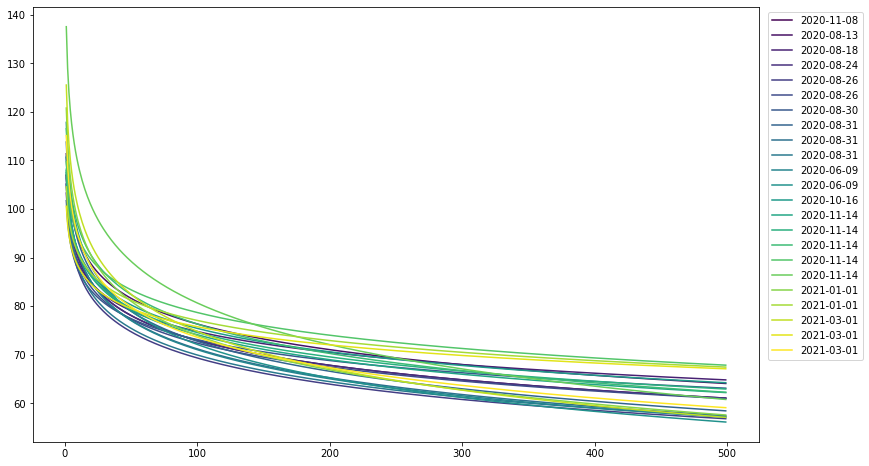

In [17]:
plt.figure(figsize=(13,8))
colors = pl.cm.viridis(np.linspace(0,1,len(files)))
stats = []
for i,file in enumerate(files):
    data = pd.read_csv(file, sep=';', parse_dates=[0,1] , infer_datetime_format=True)
    dist, rssi = data['Dist(m)'], data['RSSI(dB)']
    filt = (rssi != 0) & (dist != 0)
    # fitting
    a, b = get_rssi(rssi[filt], dist[filt])
    dist_fit = np.arange(1,500)
    rssi_fit = a * np.log(dist_fit) + b
    # stats
    stats.append((str(data['Date'][0])[:10], np.max(rssi[filt]), np.mean(rssi[filt]), np.min(rssi[filt])))
    # display
    plt.plot(dist_fit, rssi_fit, label=str(data['Date'][0])[:10], color=colors[i])
plt.legend(bbox_to_anchor=(1.15, 1))
plt.show()

In [ ]:
(stats)

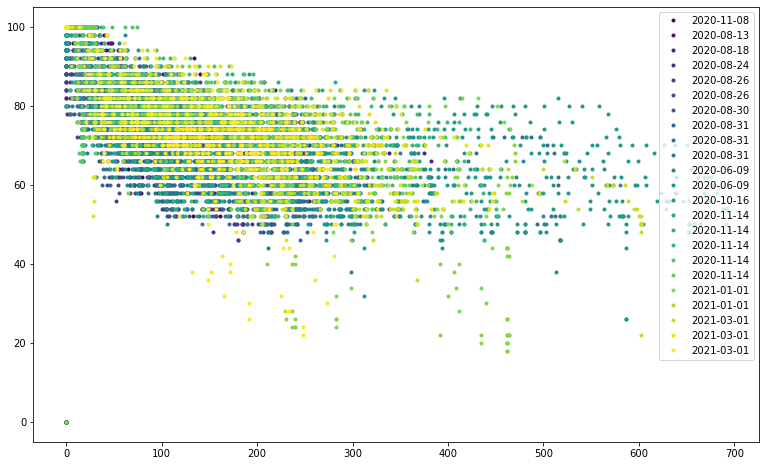

In [18]:
plt.figure(figsize=(13,8))
colors = pl.cm.viridis(np.linspace(0,1,len(files)))
for i,file in enumerate(files):
    data = pd.read_csv(file, sep=';', parse_dates=[0,1] , infer_datetime_format=True)
    dist, rssi = data['Dist(m)'], data['RSSI(dB)']
    plt.plot(dist, rssi, '.', label=str(data['Date'][0])[:10], color=colors[i])
plt.legend()
plt.show()